# Polar Plots<a id="top"></a>

This Notebook demonstrates how to create polar plots in VCS


- [Download the Jupyter notebook](PolarPlots.ipynb)

# Content

- [Preparing The Notebook](#prepare)
- [Preparing The Data](#prepare_data)
- [Basic Plot](#basic)
- [Controling the markers](#markers)
- [Plotting multiple sets (groups) at once](#multiple)
- [Clockwise vs counterclockwise](#clock)
- [Connecting the markers](#lines)
- [Controling Magnitude (Radial) Labels and ticks](#magnitude_ticks)
- [Angular ($\theta$) offset](#theta_offset)
- [Magnitude sub ticks](#mag_sub_ticks)
- [Non linear magnitude (r) scale](#non_linear)
- [Markers colored by amplitude](#marker_amplitude_color)
- [Markers colored by ${\theta}$ value](#marker_theta_value)


# Prepare modules and function to visualize<a id="prepare"></a>

[Back To Top](#top)

In [1]:
import vcs
import vcsaddons
import numpy

# class to visualize canvas
import tempfile
import base64
class VCSAddonsNotebook(object):
    def __init__(self, x):
        self.x = x
    def _repr_png_(self):
        fnm = tempfile.mktemp()+".png"
        x.png(fnm)
        encoded = base64.b64encode(open(fnm, "rb").read())
        return encoded
    def __call__(self):
        return self
    
def show(canvas):
    return VCSAddonsNotebook(canvas)()


# Prepare data and vcs objects<a id="prepare_data"></a>

Here we define some dataset for later use in the notebook, feel free to set `r` to any of these to see the changes

[Back To Top](#top)

In [2]:
# Angles
nPoints = 75
theta0 = .001
e = numpy.exp(1.)
pi = numpy.pi
thetaN =  2.*pi
delta = (thetaN-theta0)/(nPoints-1)
theta = numpy.arange(theta0,thetaN,delta)

# Archimede's spiral
r_archimede = theta
# Rose Curves
nPetals = 6
r_rose = 4.*numpy.cos(nPetals*theta)
# simple
r_simple = 5. * numpy.sin(theta)
# Another simple one
r_simple_2 = 4. - 4.*numpy.cos(theta)
# Leaf
r_leaf = (1 + 0.9*numpy.cos(8*theta))*(1 + 0.1*numpy.cos(24*theta))*(0.9 + 0.05*numpy.cos(200*theta))*(1 +numpy.sin(theta))
# Love
r_love = 2*pi/numpy.sqrt(theta) + pi/4. -2.*numpy.sin(theta)+numpy.sin(theta)*numpy.sqrt(numpy.abs(numpy.cos(theta)))/(numpy.sin(theta)+1.4)

# set which curve to vizualize
r = r_archimede

# Initialize vcs canvas
x=vcs.init(bg=True, geometry=(600,600))

# Basic (default) Plot<a id="basic"></a>

Let's plot this with a very basic plot.
[Back To Top](#top)

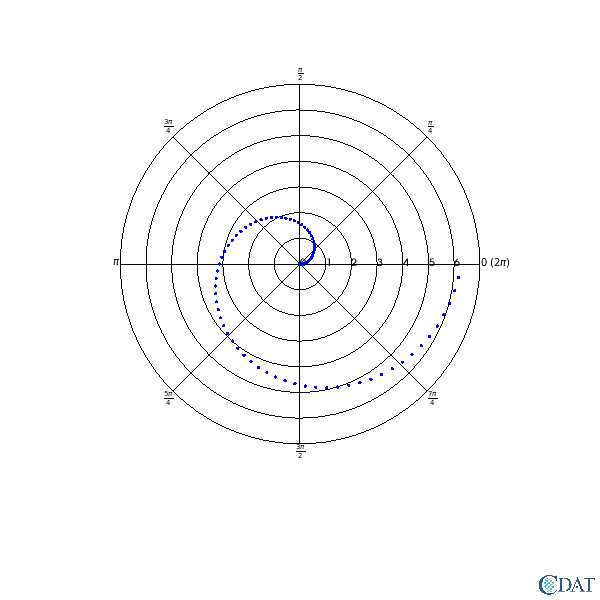

In [3]:
# Create polar graphic method
polar = vcsaddons.createpolar()
# Associate vcs canvas with it
polar.x = x
# Plot
show(polar.plot(r,theta))

# Controlling the markers<a id="markers"></a>

[Back To Top](#top)

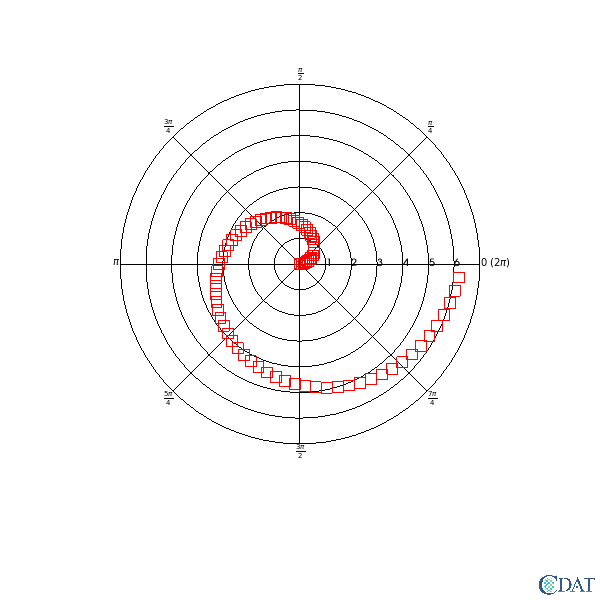

In [4]:
polar.markersizes = [2.]
polar.markercolors = ["red"]
polar.markertypes = ["square"]
x.clear()
show(polar.plot(r,theta))

# Plotting Multiple Sets (groups) At Once<a id="multiple"></a>

We can plot 3 different sets/groups at once, each with their own set of color/markers
[Back To Top](#top)

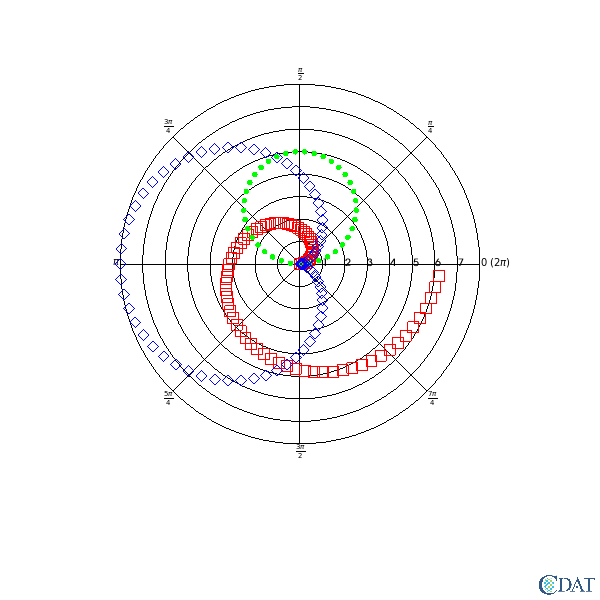

In [5]:
r2 = numpy.array([r,r_simple,r_simple_2])
polar.markercolors = ["red","green","blue"]
polar.markertypes = ["square","dot","diamond"]
polar.markersizes = [2.,5.,2.]
x.clear()
show(polar.plot(r2,theta))

# Clockwise Plots<a id="clock"></a>

Sometimes it can be useful to have $\theta$ rotating clockwise.

[Back To Top](#top)

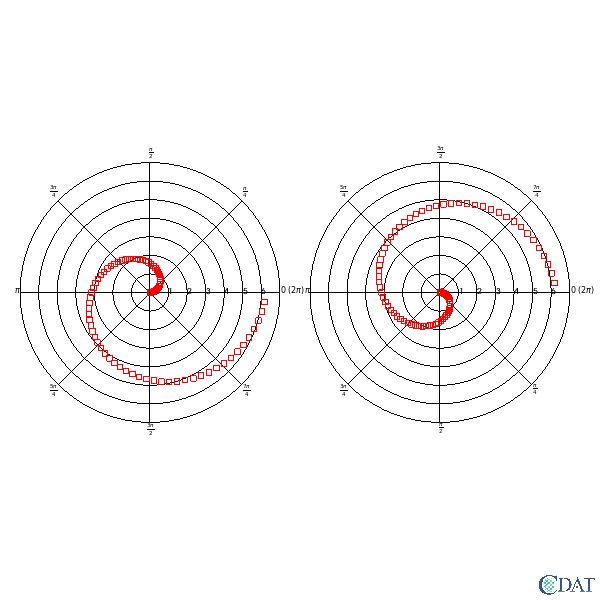

In [6]:
polar.markercolors = ["red"]
polar.markersizes= [1]
polar.markertypes = ["square"]
import EzTemplate
M = EzTemplate.Multi(columns=2,rows=1)
x.clear()
polar.plot(r,theta,template=M.get(row=0,column=0))
polar.clockwise = True
show(polar.plot(r,theta,template=M.get(row=0,column=1)))

# Connecting The Markers<a id="lines"></a>

We can also connect markers.

[Back To Top](#top)

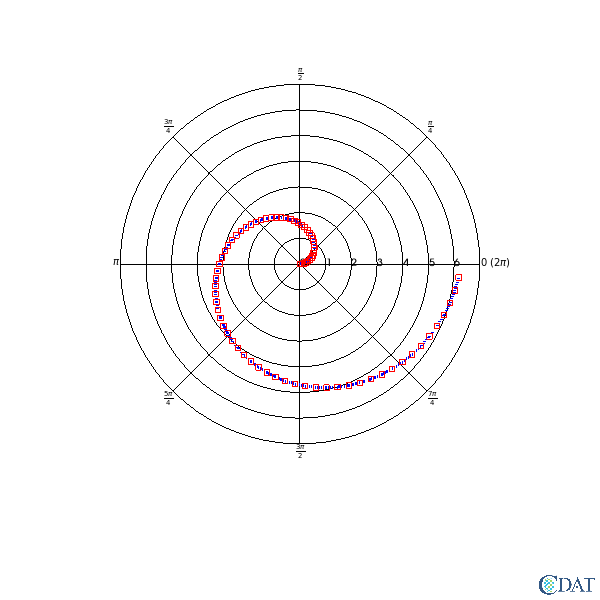

In [7]:
polar.clockwise = False
polar.linepriority=1
polar.linetypes=["dot"]
polar.linecolors = ["blue"]
polar.linewidths = [3.]
x.clear()
show(polar.plot(r,theta))

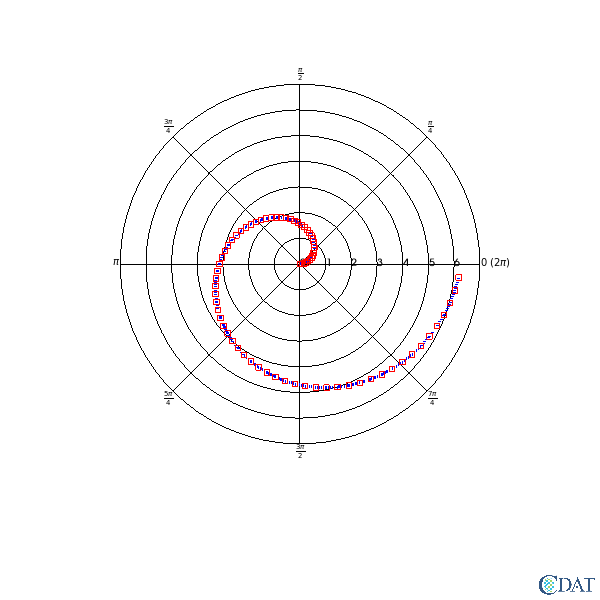

In [8]:
polar.theta_tick_count = 3
x.clear()
show(polar.plot(r,theta))

# Controlling Magnitude (Radial) Labels/Ticks<a id="magnitude_ticks"></a>

We can control the value of the magnitude labels.
Using vcs templates and text orientation objects we can control these labels angle.

[Back To Top](#top)

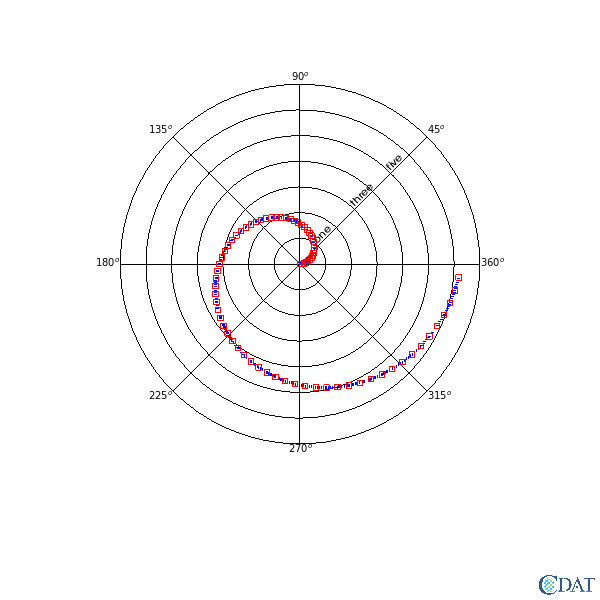

In [9]:
ticks = {}
for a in range(45,361,45):
    ticks[float(a)/180.*numpy.pi] = r"$%i^o$" % a
polar.xticlabels1 = ticks
#polar.yticlabels1 = {1.:"one",3.:"three"}
polar.datawc_y1 = 0
polar.datawc_y2= 7
polar.yticlabels1 = {1.:"one",3.:"three",5:"five"}
polar.magnitude_tick_angle = pi/4.
#polar.yticlabels1 = None
x.clear()
to = vcs.createtextorientation()
to.angle = -45
tmpl = vcs.createtemplate()
tmpl.ylabel1.textorientation = to
show(polar.plot(r,theta, template=tmpl))

# Angular ($\theta$) Offset<a id="theta_offset"></a>

Sometimes we need $\theta$ to start at some other values than 0 radians.

[Back To Top](#top)

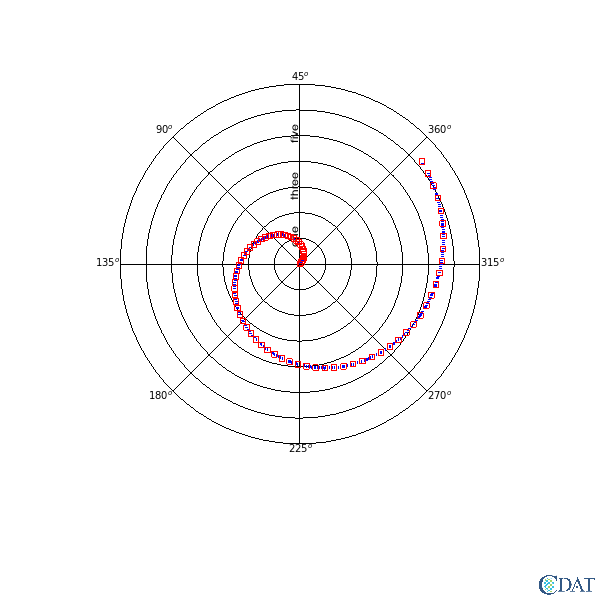

In [10]:
polar.theta_offset = pi/4.
to.angle = -90
x.clear()
show(polar.plot(r,theta, template=tmpl))

# Magnitude Sub ticks<a id="mag_sub_ticks"></a>

We can add sub ticks on the magnitude (radial) circles
Using vcs template and line objects we can control the appearance of these subticks

[Back To Top](#top)

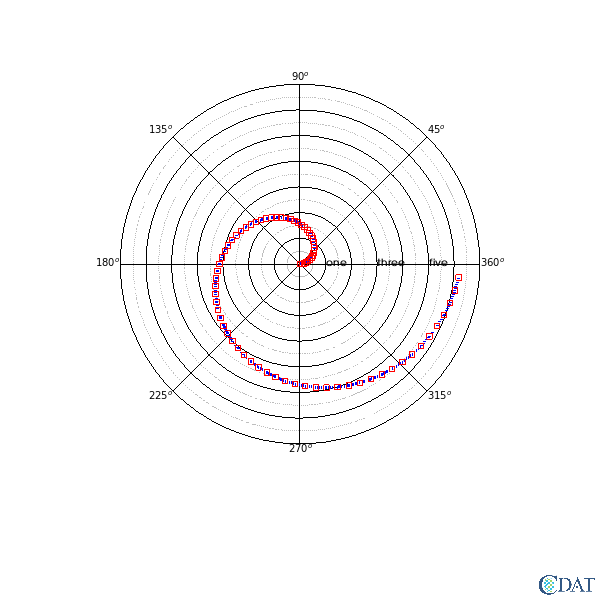

In [11]:
# reset a few things
polar.theta_offset = 0.
polar.magnitude_tick_angle = 0
to.angle = 0

dot = vcs.createline()
dot.type="dot"
dot.color = ["grey"]
tmpl.ymintic1.line = dot
tmpl.ymintic1.priority = 1
polar.magnitude_mintics = [.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
x.clear()
show(polar.plot(r,theta, template=tmpl))

# Non Linear Magnitude (Radial) Scales<a id="non_linear"></a>

Sometimes it can be useful to have a non linear scale for the radius

[Back To Top](#top)

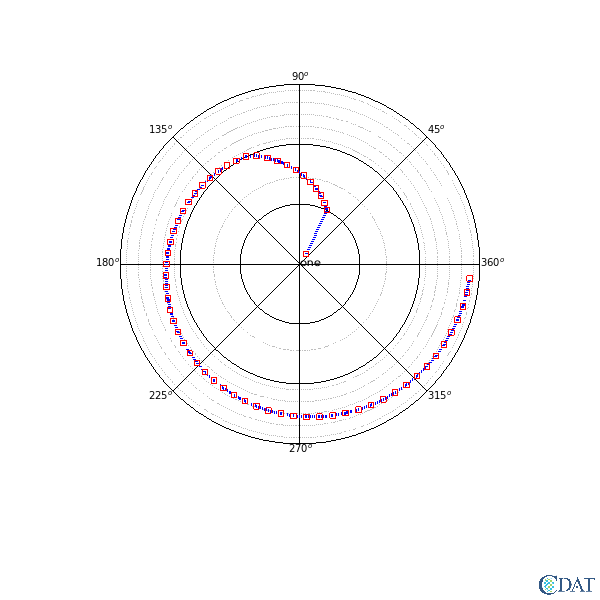

In [12]:
polar.magnitude_ticks = [1,1.1,2,7]
polar.datawc_y1 = 1.e20
polar.datawc_y2 = 1.e20
x.clear()
show(polar.plot(r,theta, template=tmpl))

# Using Amplitude To Control Markers Colors<a id="marker_amplitude_color"></a>

It can be useful to link the markers color to the magnitude

[Back To Top](#top)

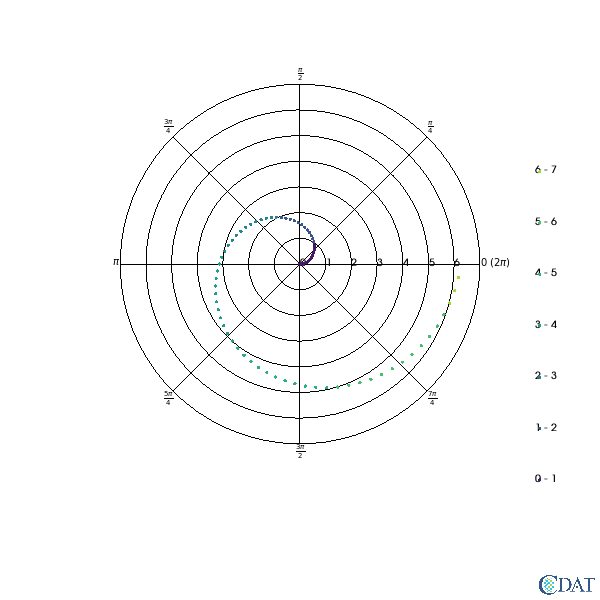

In [13]:
x.clear()
polar = vcsaddons.createpolar()
polar.x=x
polar.markercolors = [16, 66, 116, 143, 162, 181, 200, 219]
polar.markercolorsource = "magnitude"
tmpl = vcs.createtemplate()
tmpl.legend.x1=.9
tmpl.legend.x2=.99
tmpl.legend.y1 = .2
tmpl.legend.y2=.8
x.clear()
show(polar.plot(r,theta,template=tmpl))

# Using $\theta$ To Control Markers Colors<a id="marker_theta_value"></a>

It can be useful to link the markers color to $\theta$

[Back To Top](#top)

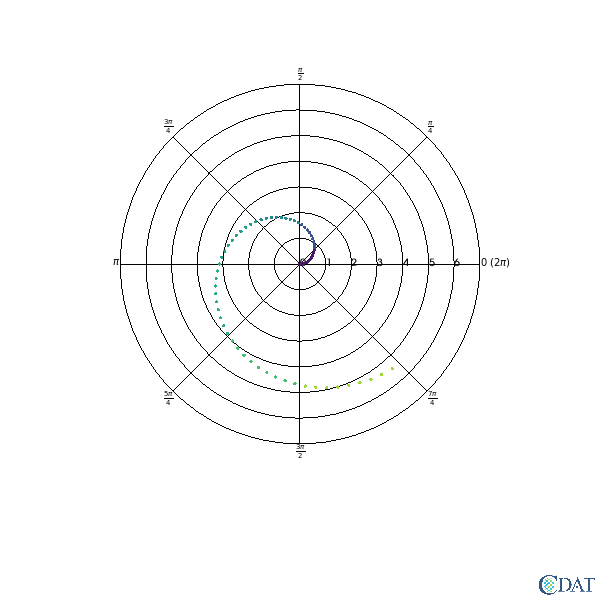

In [14]:
x.clear()
polar = vcsaddons.createpolar()
polar.x=x
polar.markercolors = [16, 66, 116, 143, 162, 181, 200, 219]
polar.markercolorsource = "theta"
tmpl = vcs.createtemplate()
tmpl.legend.priority=0
x.clear()
show(polar.plot(r,theta,template=tmpl))